<a href="https://colab.research.google.com/github/LujainOwaimer/Exercises/blob/main/YOLO_Practice_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Highway Vehicle Counting Practice Exercise


In this exercise, you will use the YOLO (You Only Look Once) object detection model to analyze a video of highway traffic.
Your task is to count the number of cars that are leaving the highway (coming toward the camera) on the right side and the number of cars that are joining the road on the left side. The video can be found under `Datasets/Example.mp4`.

## Objectives
- Load and process a video using OpenCV.
- Use the YOLO model to detect vehicles in each frame.
- Use OpenCV to manulate the video.
- Track vehicles as they move through the video frames.
- Count the number of vehicles leaving the highway on the right side.
- Count the number of vehicles joining the road on the left side.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install ultralytics

## Setup Environment

Before you begin, ensure you have the necessary libraries installed. You will need `opencv`, and `ultralytics` among others.
If these are not installed, you should install them.

In [3]:
from ultralytics import YOLO, solutions
import os
from IPython.display import Image, display
from IPython import display
display.clear_output()


## Load the YOLO Model

You will first need to load the YOLO model. You can use a pre-trained YOLO model for this task.
Write the code to load the YOLO model below:


In [4]:
import cv2
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

## Prepare the Video Capture

Create a variable to capture the video frames, you can use `cv2.VideoCapture()` to achive this.

## Get Video Information

You can use `cv2` library to get these information fro the `VideoCapture()` variable you created to extract these information:
* `height`: Video's height.
* `width`: Video's width.
* `fps`: Video's frames.

In [5]:
cap = cv2.VideoCapture('/content/drive/MyDrive/input_video/Example.mp4')
assert cap.isOpened(), 'Error reading video file'
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

In [48]:
#video_path = '/content/drive/MyDrive/input_video/Example.mp4'  # Path to the video file to be processed
#cap = cv2.VideoCapture(video_path)
# width = int (cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# fps = int(cap.get(cv2.CAP_PROP_FPS))



Height: 720, Width: 1280, FPS: 25


Next, we calculate the vertical middle of the frame and define the coordinates for the line. This line will be used to count objects as they cross it.

In [6]:
mid_y = h // 2
line_points = [(20, mid_y), (w - 20, mid_y)]

## Prepare Video Writer to Store the Output

Create a variable that uses `cv2.VideoCapture()` to save the video with the bounding boxes and the counted cars on both sides. You will need to make the video with the same `fps`, `width`, `height`, and specify the codec and output path of the video.

In [7]:
video_writer = cv2.VideoWriter('counting_output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (w, h))

In [68]:
output_path = '/content/output_video_with_yolov8.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (w, h))

In [8]:
ret, frame = cap.read()

results = model(frame)


0: 384x640 11 cars, 1 bus, 1 train, 1 truck, 349.2ms
Speed: 25.9ms preprocess, 349.2ms inference, 30.8ms postprocess per image at shape (1, 3, 384, 640)


In [9]:
results[0].boxes.xyxy.cpu().numpy()

array([[     736.34,       403.4,      793.64,      456.49],
       [     860.39,      435.72,      932.31,      496.83],
       [     298.84,      668.19,      440.34,      719.39],
       [     376.22,       412.7,      438.42,      465.91],
       [      535.7,      361.67,      574.71,      400.29],
       [     1031.9,      486.66,      1152.2,      578.48],
       [     755.22,      275.14,      808.43,      331.24],
       [     986.82,      200.73,      1275.9,      284.05],
       [     201.91,      440.03,      289.34,      498.49],
       [     678.56,      304.35,      705.44,      327.44],
       [     497.39,      327.79,      531.25,      356.12],
       [      439.3,      325.54,      478.02,      352.22],
       [     567.39,      311.48,       598.3,      333.19],
       [     764.75,      276.44,      807.48,      332.08]], dtype=float32)

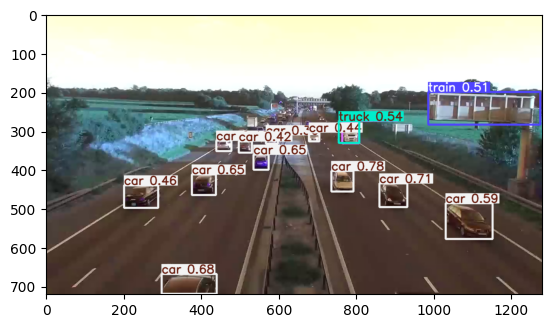

In [10]:
import matplotlib.pyplot as plt  # Importing Matplotlib for displaying images

# Get the annotated frame with detections from the YOLO model
annotated_frame = results[0].plot()  # The 'plot()' method returns the image with bounding boxes and labels drawn on it

# Display the annotated frame using Matplotlib
plt.imshow(annotated_frame)  # Displays the annotated frame as an image in the notebook
plt.show()

In [11]:
for result in results:  # Iterates through each detection result (one for each image/frame)
    # Prints the bounding box coordinates in XYXY format
    print("Bounding Box Coordinates (XYXY):\n", result.boxes.xyxy.cpu().numpy(), "\n")
    # The bounding box coordinates are moved to the CPU and converted to a NumPy array, then printed.

    # Prints the confidence scores for each detected object
    print("Confidence Scores:\n", result.boxes.conf.cpu().numpy(), "\n")
    # Confidence scores represent the model's confidence in the detection for each object.
    # These are also moved to the CPU and converted to a NumPy array before printing.

    # Prints the class labels for each detected object
    print("Class Labels:\n", result.boxes.cls.cpu().numpy(), "\n")

Bounding Box Coordinates (XYXY):
 [[     736.34       403.4      793.64      456.49]
 [     860.39      435.72      932.31      496.83]
 [     298.84      668.19      440.34      719.39]
 [     376.22       412.7      438.42      465.91]
 [      535.7      361.67      574.71      400.29]
 [     1031.9      486.66      1152.2      578.48]
 [     755.22      275.14      808.43      331.24]
 [     986.82      200.73      1275.9      284.05]
 [     201.91      440.03      289.34      498.49]
 [     678.56      304.35      705.44      327.44]
 [     497.39      327.79      531.25      356.12]
 [      439.3      325.54      478.02      352.22]
 [     567.39      311.48       598.3      333.19]
 [     764.75      276.44      807.48      332.08]] 

Confidence Scores:
 [     0.7845     0.70811     0.67665     0.65061     0.64916     0.58627     0.54419     0.51033     0.46396     0.43906      0.4229     0.42066      0.3563     0.28842] 

Class Labels:
 [          2           2           2      

## Process Video Frames and Identify Vehicles on the Right and Left Sides

For each frame in the video, use the YOLO model to detect and track vehicles. You'll need to write a loop that processes each frame and applies the YOLO model.
In each frame, after detecting the vehicles, determine whether they are on the left or right side of the highway.
You can use the position of the bounding boxes provided by YOLO to do this.
* The video should display bounding boxes around the detected objects.
* The video should display the confidence along side with the object id and class id of each detected and tracked object.
* The video display the number of vehicles on the left side.
* The video display the number of vehicles on the right side.
* The video should display the line in which you counted the objects that have crossed it and counted.

In [12]:
counter = solutions.ObjectCounter(
    view_img=True,
    reg_pts=line_points,
    names=model.names,
    draw_tracks=True,
    line_thickness=2,
)
while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print('Video frame is empty or video processing has been successfully completed.')
        break

    # Perform object tracking
    tracks = model.track(im0, persist=True, show=False)

    # Count objects and draw the middle line
    im0 = counter.start_counting(im0, tracks)
    video_writer.write(im0)
cap.release()
video_writer.release()
cv2.destroyAllWindows()

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Line Counter Initiated.

0: 384x640 5 cars, 567.4ms
Speed: 10.2ms preprocess, 567.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 540.0ms
Speed: 2.7ms preprocess, 540.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 422.7ms
Speed: 10.8ms preprocess, 422.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 203.4ms
Speed: 4.5ms preprocess, 203.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 254.0ms
Speed: 5.6ms preprocess, 254.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 213.2ms
Speed: 5.2ms preprocess, 213.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 1 truck, 214.1ms
Speed: 4.4ms preprocess, 214.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x6

## Save and Submit Your Work

In the actual exam you will be asked to submit both the notebook and the output video

In [13]:
print(f"Video saved to {video_writer}")
# video link : https://streamable.com/rd8ny3

Video saved to < cv2.VideoWriter 0x780674f51530>
